In [1]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Succ

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflowjs as tfjs

In [ ]:
# !pip install kaggle

In [ ]:
# kaggle.json file is created and stored in local drive and is uploaded

from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d ismailnasri20/driver-drowsiness-dataset-ddd

100% 2.57G/2.58G [00:34<00:00, 49.3MB/s]
100% 2.58G/2.58G [00:34<00:00, 81.1MB/s]


In [5]:
!unzip driver-drowsiness-dataset-ddd

Streaming output truncated to the last 5000 lines.
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0082.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0083.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0084.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0085.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0086.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0087.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0088.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0089.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0090.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0091.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0092.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0093.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0094.png  
  inflating: Driver Drowsiness Dataset (DDD)/Non Drowsy/y0095.png

In [6]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# The dowloaded folder "Driver Drowsiness Dataset (DDD)" is renamed to "Driver_Drowsiness_Dataset"
train_dir = "/content/Driver_Drowsiness_Dataset"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

class_names = train_dataset.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in train_dataset.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

# train batches are distributed into 80% train batches and 20% valid batches
train_batches = tf.data.experimental.cardinality(train_dataset)
valid_dataset = train_dataset.take(train_batches // 5)
train_dataset = train_dataset.skip(train_batches // 5)

# valid batches are distributed into 50% valid batches and 50% test batches
valid_batches = tf.data.experimental.cardinality(valid_dataset)
test_dataset = valid_dataset.take(valid_batches // 2)
valid_dataset = valid_dataset.skip(valid_batches // 2)

print('Number of train batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(valid_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Found 41793 files belonging to 2 classes.
Number of train batches: 1046
Number of validation batches: 131
Number of test batches: 130


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal'), tf.keras.layers.RandomRotation(0.2),])

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
#     tf.keras.layers.RandomContrast(0.2),
#     tf.keras.layers.GaussianNoise(0.2)
# ])

In [8]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [9]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [10]:
base_model.trainable = False

base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [11]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1280)
(32, 1)


In [ ]:
# def build_model(learning_rate, optimizer):
#     inputs = tf.keras.Input(shape=(160, 160, 3))
#     x = data_augmentation(inputs)
#     x = preprocess_input(x)
#     x = base_model(x, training=False)
#     x = global_average_layer(x)
#     x = tf.keras.layers.Dropout(0.2)(x)
#     outputs = prediction_layer(x)

#     model = tf.keras.Model(inputs, outputs)
#     model.compile(optimizer=optimizer,
#                   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#                   metrics=['accuracy'])

#     return model

# import random

# def random_search_hyperparameters(param_space, num_trials):
#     best_accuracy = 0.0
#     best_hyperparameters = {}

#     for _ in range(num_trials):
#         random_hyperparameters = {}
#         for param, values in param_space.items():
#             random_hyperparameters[param] = random.choice(values)

#         model = build_model(**random_hyperparameters)

#         num_epochs = 25

#         callbacks_list = [
#             ModelCheckpoint(
#                 filepath= '../checkpoint/-{epoch:02d}-{val_accuracy:.2f}.h5',
#                 monitor='val_accuracy', save_best_only=True),
#                 EarlyStopping(monitor='val_loss', patience=5)
#         ]

#         model.fit(train_dataset, epochs=num_epochs, callbacks=callbacks_list, validation_data=valid_dataset, shuffle=True)

#         _, accuracy = model.evaluate(valid_dataset)

#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_hyperparameters = {**random_hyperparameters, 'num_epochs': num_epochs}

#     return best_hyperparameters, best_accuracy

# param_space = {
#     'learning_rate': [0.0001, 0.001, 0.01, 0.1],
#     'optimizer': ['adam', 'sgd']
# }

# num_trials = 10

# best_hyperparameters, best_accuracy = random_search_hyperparameters(param_space, num_trials)

# print("Best Hyperparameters:", best_hyperparameters)
# print("Best Accuracy:", best_accuracy)


In [12]:
inputs = tf.keras.Input(shape=(160, 160, 3))

# Custom preprocessing

def custom_preprocess_input(image):
    image = image / 127.5 - 1.0

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = (image - mean) / std

    return image

preprocessed_image = custom_preprocess_input(inputs)

input_tensor = tf.convert_to_tensor(preprocessed_image, dtype=tf.float32)

# x = data_augmentation(inputs)
x = base_model(input_tensor, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=input_tensor, outputs=outputs)


In [13]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 

In [14]:
len(model.trainable_variables)

2

In [15]:
initial_epochs = 10

history = model.fit(train_dataset, epochs=initial_epochs, validation_data=valid_dataset)

# from keras.callbacks import EarlyStopping, ModelCheckpoint

# initial_epochs = 100

# callbacks_list = [
#     ModelCheckpoint(
#         filepath= '../checkpoint/-{epoch:02d}-{val_accuracy:.2f}.h5',
#         monitor='val_accuracy', save_best_only=True),
#     EarlyStopping(monitor='val_loss', patience=10)
# ]

# history = model.fit(train_dataset, epochs=initial_epochs, callbacks=callbacks_list, validation_data=valid_dataset, shuffle=True)

Epoch 1/10
1046/1046 [==============================] - 845s 783ms/step - loss: 0.5553 - accuracy: 0.6964 - val_loss: 0.4027 - val_accuracy: 0.8058
Epoch 2/10
1046/1046 [==============================] - 837s 779ms/step - loss: 0.3826 - accuracy: 0.8240 - val_loss: 0.3032 - val_accuracy: 0.8700
Epoch 3/10
1046/1046 [==============================] - 833s 780ms/step - loss: 0.3071 - accuracy: 0.8700 - val_loss: 0.2469 - val_accuracy: 0.9148
Epoch 4/10
1046/1046 [==============================] - 853s 799ms/step - loss: 0.2625 - accuracy: 0.8946 - val_loss: 0.2113 - val_accuracy: 0.9325
Epoch 5/10
1046/1046 [==============================] - 846s 792ms/step - loss: 0.2288 - accuracy: 0.9127 - val_loss: 0.1816 - val_accuracy: 0.9463
Epoch 6/10
1046/1046 [==============================] - 842s 786ms/step - loss: 0.2021 - accuracy: 0.9257 - val_loss: 0.1604 - val_accuracy: 0.9504
Epoch 7/10
1046/1046 [==============================] - 849s 793ms/step - loss: 0.1867 - accuracy: 0.9315 - val_

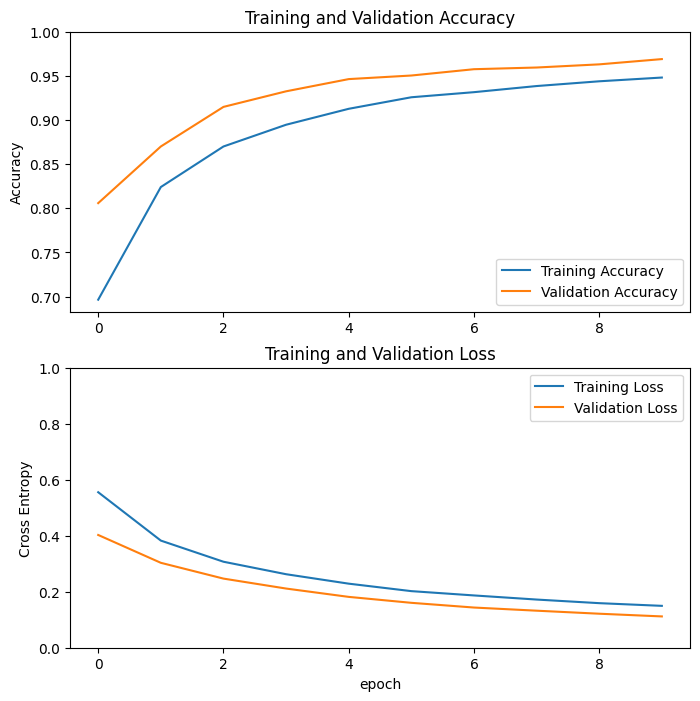

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [17]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [18]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1862721 (7.

In [19]:
len(model.trainable_variables)

56

In [20]:
fine_tune_epochs = 6

total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset, epochs=total_epochs, initial_epoch=history.epoch[-1], validation_data=valid_dataset)

# from keras.callbacks import EarlyStopping, ModelCheckpoint

# callbacks_list = [
#     ModelCheckpoint(
#         filepath= '../checkpoint/-{epoch:02d}-{val_accuracy:.1f}.h5',
#         monitor='val_accuracy', save_best_only=True),
#     EarlyStopping(monitor='val_loss', patience=5)
# ]

# history_fine = model.fit(train_dataset, epochs=total_epochs, callbacks=callbacks_list,initial_epoch=history.epoch[-1], validation_data=valid_dataset, shuffle=True)

Epoch 10/16
1046/1046 [==============================] - 1267s 1s/step - loss: 0.0468 - accuracy: 0.9840 - val_loss: 0.0113 - val_accuracy: 0.9957
Epoch 11/16
1046/1046 [==============================] - 1232s 1s/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0033 - val_accuracy: 0.9988
Epoch 12/16
1046/1046 [==============================] - 1285s 1s/step - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.0058 - val_accuracy: 0.9976
Epoch 13/16
1046/1046 [==============================] - 1204s 1s/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 14/16
1046/1046 [==============================] - 1250s 1s/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0019 - val_accuracy: 0.9990
Epoch 15/16
1046/1046 [==============================] - 1261s 1s/step - loss: 6.4826e-04 - accuracy: 0.9998 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 16/16
1046/1046 [==============================] - 1279s 1s/step - loss: 5.7151e-04 - accuracy: 0.9998 - val

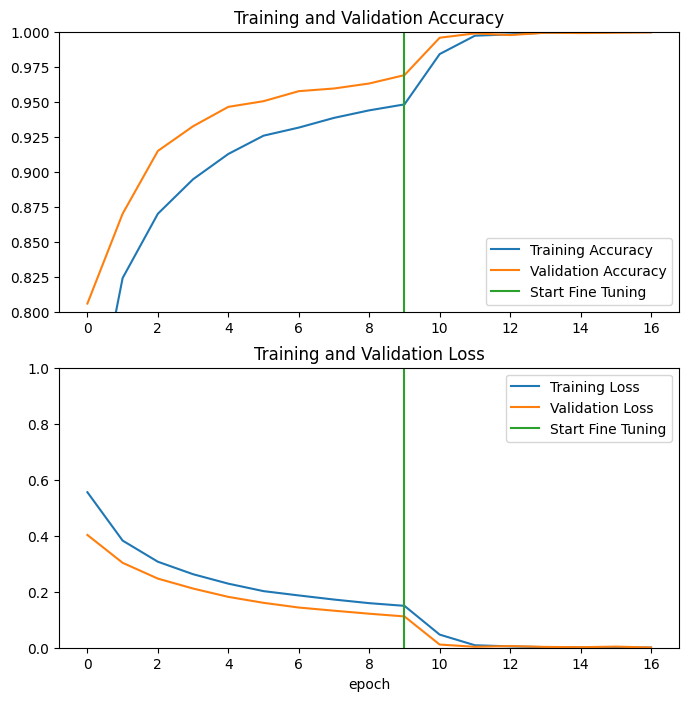

In [21]:

acc.extend(history_fine.history['accuracy'])
val_acc.extend(history_fine.history['val_accuracy'])

loss.extend(history_fine.history['loss'])
val_loss.extend(history_fine.history['val_loss'])

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
loss, accuracy = model.evaluate(test_dataset)
print('Test loss :', loss)
print('Test accuracy :', accuracy)

130/130 [==============================] - 92s 697ms/step - loss: 0.0011 - accuracy: 0.9995
Test loss : 0.0010685535380616784
Test accuracy : 0.9995192289352417


Predictions:
 [0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
Labels:
 [0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]


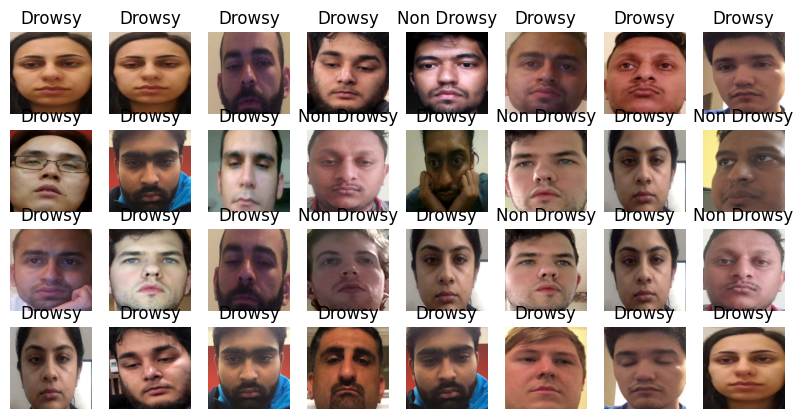

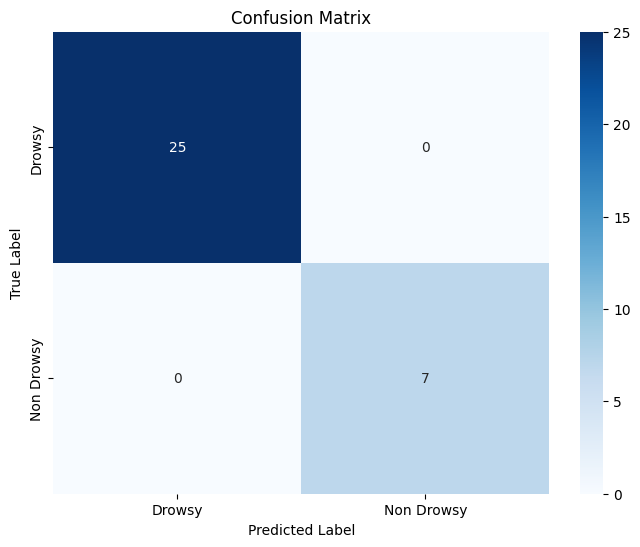

              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00        25
  Non Drowsy       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Balanced acc score: 1.0
Balanced error rate: 0.0


In [23]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(32):
  ax = plt.subplot(4, 8, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")


import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score

cm = confusion_matrix(label_batch, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(label_batch, predictions, target_names=class_names))
print("Balanced acc score:", balanced_accuracy_score(label_batch, predictions))
print("Balanced error rate:", 1 - balanced_accuracy_score(label_batch, predictions))

130/130 [==============================] - 78s 589ms/step
Predictions:
 [[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]
Labels:
 [0 0 1 ... 1 1 0]


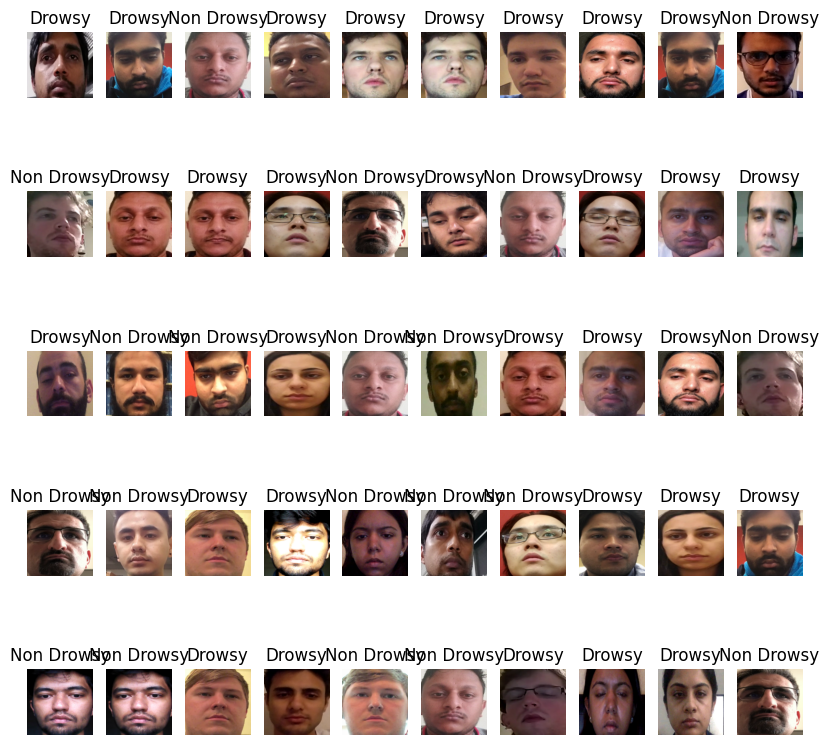

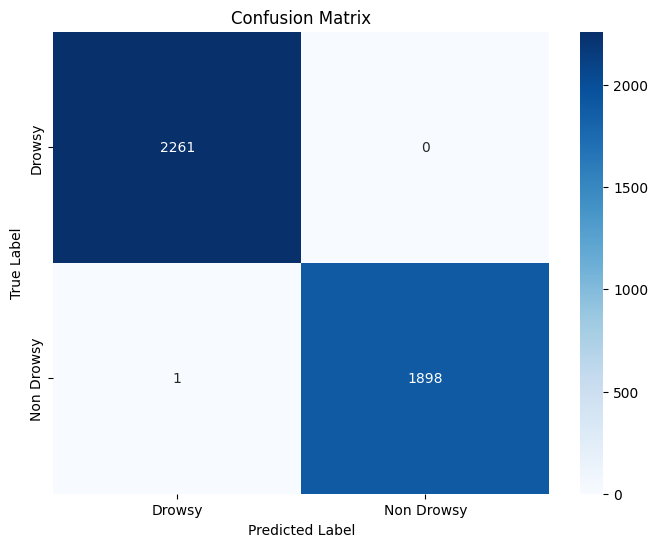

              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      2261
  Non Drowsy       1.00      1.00      1.00      1899

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160

Balanced acc score: 0.9997367035281728
Balanced error rate: 0.0002632964718272124


In [24]:
images, labels = [], []
for image_batch, label_batch in test_dataset.as_numpy_iterator():
    images.extend(image_batch)
    labels.extend(label_batch)

images = np.array(images)
labels = np.array(labels)

predictions = model.predict(images)

predictions = tf.nn.sigmoid(predictions).numpy()
predictions = np.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions)
print('Labels:\n', labels)

plt.figure(figsize=(10, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(images[i].astype("uint8"))
  plt.title(class_names[predictions[i][0]])
  plt.axis("off")


import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score

cm = confusion_matrix(labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(labels, predictions, target_names=class_names))
print("Balanced acc score:", balanced_accuracy_score(labels, predictions))
print("Balanced error rate:", 1 - balanced_accuracy_score(labels, predictions))


In [52]:
# from google.colab import drive
# drive.mount('/content/drive/MyDrive')

tfjs_target_dir = "frugalX/main"

tfjs.converters.save_keras_model(model, tfjs_target_dir)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
